In [1]:
 !pip install tensorflow --upgrade

In [2]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of lay
from tensorflow.keras import layers #A Layer consists of a tensor- in tens
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is t
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt #used for data visualization

In [3]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()

In [4]:
print (x_train.shape) #shape is used for give the dimens ion values #6000
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [5]:
x_train[0] #printing the first image

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [50]:
y_train[5]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

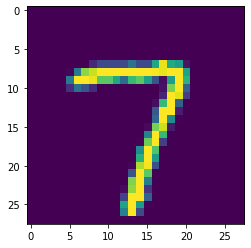

In [6]:
plt.imshow(x_train[5100]) #ploting the index=image

In [7]:
np.argmax(y_train[5100])

0

In [8]:
#Reshaping to format which CNN expects (bitch, height, width, channels)
x_train = x_train.reshape(60000, 28, 28, 1).astype('float32')
x_test = x_test.reshape(10000, 28, 28, 1).astype('float32')

In [9]:
number_of_classes = 10 #storing the no of classes in a variable


In [10]:
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary form
y_test = np_utils.to_categorical (y_test, number_of_classes)

In [47]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [11]:
#create model
model=Sequential ()

In [12]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [13]:
#flatten the dimension of the image
model.add(Flatten())

In [14]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

In [15]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [16]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

In [17]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5,  batch_size=32)


Epoch 1/5
1875/1875 [==============================] - 150s 79ms/step - loss: 0.1943 - accuracy: 0.9523 - val_loss: 0.1069 - val_accuracy: 0.9673
Epoch 2/5
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0681 - accuracy: 0.9793 - val_loss: 0.0863 - val_accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 146s 78ms/step - loss: 0.0498 - accuracy: 0.9841 - val_loss: 0.0909 - val_accuracy: 0.9739
Epoch 4/5
1875/1875 [==============================] - 153s 82ms/step - loss: 0.0360 - accuracy: 0.9879 - val_loss: 0.0857 - val_accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 153s 81ms/step - loss: 0.0271 - accuracy: 0.9919 - val_loss: 0.1078 - val_accuracy: 0.9754


In [52]:
#Test the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test Loss & Test Accuracy): ")
print(metrics)

Metrics (Test Loss & Test Accuracy): 
[0.10784754902124405, 0.9753999710083008]


In [54]:
prediction = model.predict(x_test[:4])
print(prediction)

1/1 [==============================] - 0s 184ms/step
[[5.18505239e-11 4.02403022e-22 2.79445963e-11 5.49446156e-07
  3.78675972e-17 9.00084315e-15 5.76359159e-20 9.99999285e-01
  1.70637584e-11 1.29772161e-07]
 [2.08625187e-10 1.61516522e-10 9.99999762e-01 1.08138609e-10
  3.95821302e-16 2.18139191e-17 2.02886326e-07 1.75844058e-20
  5.98207039e-11 2.63723597e-20]
 [8.25036750e-08 9.99770939e-01 4.80994402e-07 6.77759515e-10
  7.62084092e-05 1.06307125e-05 3.41851461e-07 6.39700986e-08
  1.41223092e-04 6.05385273e-12]
 [9.99999881e-01 1.67435185e-12 6.55135635e-09 2.41568104e-14
  9.74067940e-13 3.74899683e-13 1.37426881e-07 1.11208102e-12
  3.14200506e-11 1.36123077e-08]]


In [56]:
print(np .argmax(prediction, axis=1))
print(y_test[:4])


[7 2 1 0]
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [58]:
model.save("models/mnistCNN1.h5")